# Preliminary Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing


We import all the various datasets

In [2]:
mcf7_smartS_meta = pd.read_csv("Data/SmartSeq/MCF7_SmartS_MetaData.tsv",delimiter="\t", index_col=0)
mcf7_smartS_filn = pd.read_csv("Data/SmartSeq/MCF7_SmartS_Filtered_Normalised_3000_Data_train.txt",delimiter=" ",index_col=0).T
hcc_smartS_meta = pd.read_csv("Data/SmartSeq/HCC1806_SmartS_MetaData.tsv",delimiter="\t",index_col=0)
hcc_smartS_filn = pd.read_csv("Data/SmartSeq/HCC1806_SmartS_Filtered_Normalised_3000_Data_train.txt",delimiter=" ",index_col=0).T
mcf7_dropS_filn = pd.read_csv("Data/DropSeq/MCF7_Filtered_Normalised_3000_Data_train.txt",delimiter=" ",index_col=0).T
hcc_dropS_filn = pd.read_csv("Data/DropSeq/HCC1806_Filtered_Normalised_3000_Data_train.txt",delimiter=" ",index_col=0).T
mcf7_smartS_filt = pd.read_csv("Data/SmartSeq/MCF7_SmartS_Filtered_Data.txt",delimiter=" ",index_col=0).T
hcc_smartS_filt = pd.read_csv("Data/SmartSeq/HCC1806_SmartS_Filtered_Data.txt",delimiter=" ",index_col=0).T
mcf7_smartS_raw = pd.read_csv("Data/SmartSeq/MCF7_SmartS_Unfiltered_Data.txt",delimiter=" ",index_col=0).T
hcc_smartS_raw = pd.read_csv("Data/SmartSeq/HCC1806_SmartS_Unfiltered_Data.txt",delimiter=" ",index_col=0).T

## Smartseq

Since we have unfiltered data only for the Smart sequencing, we will focus on Smartseq. Let us start with MCF7

In [3]:
mcf7_smartS_raw

,WASH7P,MIR6859-1,WASH9P,OR4F29,MTND1P23,MTND2P28,MTCO1P12,MTCO2P12,MTATP8P1,MTATP6P1,...,MT-TH,MT-TS2,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB,MT-TT,MT-TP,MAFIP
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam,0,0,1,0,0,2,2,0,0,29,...,0,0,0,505,147,4,270,0,5,8
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,1,0,0,0
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam,0,0,0,0,0,1,1,1,0,12,...,0,0,0,1,0,0,76,0,0,0
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam,0,0,0,0,0,0,0,0,0,7,...,1,0,0,44,8,0,66,0,1,0
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam,0,0,0,0,0,0,0,0,0,68,...,0,0,0,237,31,3,727,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam,0,0,0,0,0,0,1,0,0,49,...,0,0,1,341,46,1,570,0,0,0
output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam,0,0,1,0,0,2,5,5,0,370,...,0,0,2,1612,215,6,3477,3,7,6
output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam,1,0,1,0,0,7,0,0,0,33,...,0,0,0,62,20,0,349,0,2,0
output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam,0,0,4,1,0,29,4,0,0,228,...,3,0,2,1934,575,7,2184,2,28,1


In [4]:
mcf7_smartS_filt

,WASH7P,MIR6859-1,WASH9P,OR4F29,MTND1P23,MTND2P28,MTCO1P12,MTCO2P12,MTATP8P1,MTATP6P1,...,MT-TH,MT-TS2,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB,MT-TT,MT-TP,MAFIP
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam,0,0,1,0,0,2,2,0,0,29,...,0,0,0,505,147,4,270,0,5,8
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam,0,0,0,0,0,1,1,1,0,12,...,0,0,0,1,0,0,76,0,0,0
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam,0,0,0,0,0,0,0,0,0,68,...,0,0,0,237,31,3,727,0,0,0
output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam,0,0,1,0,0,1,3,0,0,203,...,1,0,0,894,113,3,2717,1,1,0
output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam,0,0,10,0,0,3,10,1,0,691,...,1,0,3,1279,131,0,9326,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam,0,0,0,0,0,0,1,0,0,49,...,0,0,1,341,46,1,570,0,0,0
output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam,0,0,1,0,0,2,5,5,0,370,...,0,0,2,1612,215,6,3477,3,7,6
output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam,1,0,1,0,0,7,0,0,0,33,...,0,0,0,62,20,0,349,0,2,0
output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam,0,0,4,1,0,29,4,0,0,228,...,3,0,2,1934,575,7,2184,2,28,1


In [5]:
mcf7_smartS_filn

,CYP1B1,CYP1B1-AS1,CYP1A1,NDRG1,DDIT4,PFKFB3,HK2,AREG,MYBL2,ADM,...,CD27-AS1,DNAI7,MAFG,LZTR1,BCO2,GRIK5,SLC25A27,DENND5A,CDK5R1,FAM13A-AS1
output.STAR.2_B3_Norm_S57_Aligned.sortedByCoord.out.bam,343,140,0,0,386,75,0,0,476,0,...,63,0,17,59,0,0,0,51,0,0
output.STAR.2_B4_Norm_S58_Aligned.sortedByCoord.out.bam,131,59,0,1,289,42,0,856,1586,0,...,0,0,1,25,0,0,0,34,0,0
output.STAR.2_B5_Norm_S59_Aligned.sortedByCoord.out.bam,452,203,0,0,0,0,0,0,775,0,...,15,0,23,0,0,0,0,0,0,0
output.STAR.2_B6_Norm_S60_Aligned.sortedByCoord.out.bam,27,7,0,0,288,214,15,242,1191,0,...,1,0,3,10,0,0,0,4,0,0
output.STAR.2_B7_Hypo_S79_Aligned.sortedByCoord.out.bam,5817,2669,0,654,2484,1603,748,436,0,0,...,0,0,63,0,0,0,0,60,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam,196,102,1,243,266,278,78,1,199,0,...,79,0,1,0,0,0,0,45,19,0
output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam,504,238,0,62,417,932,275,0,33,0,...,86,0,0,0,0,0,0,0,0,0
output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam,34565,13717,11274,1263,4256,5663,701,0,0,0,...,0,0,45,0,0,0,0,140,0,32
output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam,20024,7835,563,925,12733,2187,1141,0,20,81,...,0,0,57,8,0,0,0,7,0,11


We first check that the filtered dataset is a subset of the raw dataset, we do this by checking that the shape of the filtered dataset and the intersection between the latter and the raw one coincide.

In [6]:

# Find the intersection of rows and columns
common_rows = mcf7_smartS_raw.index.intersection(mcf7_smartS_filt.index)
common_columns = mcf7_smartS_raw.columns.intersection(mcf7_smartS_filt.columns)

# Create a new DataFrame based on the intersection of rows and columns
df_inters = mcf7_smartS_raw.loc[common_rows, common_columns]

# Compare the shapes
print(df_inters.shape == mcf7_smartS_filt.shape)


True


It is indeed true. Now we check if there are rows or columns with missing values in the raw dataset. We see that there are not. The same holds for rows or columns with just zeros.

In [7]:
# Drop rows with any missing values
df_ = mcf7_smartS_raw.dropna(axis=0, how='any')

# Drop columns with any missing values
df_ = df_.dropna(axis=1, how='any')


# Display the resulting dataset
print("Shape of df_:", df_.shape)




Shape of df_: (383, 22934)


In [8]:
# Drop columns that are all zeros
df_nonzero = mcf7_smartS_raw.loc[:, (mcf7_smartS_raw != 0).any(axis=0)]

# Drop rows that are all zeros
df_nonzero= df_nonzero.loc[(df_nonzero != 0).any(axis=1), :]


# Display the resulting dataset
print("Shape of df_nonzero:", df_nonzero.shape)




Shape of df_nonzero: (383, 22934)


Now we take a look at the removed rows and removed columns.

In [9]:

rows_removed = mcf7_smartS_raw.loc[~mcf7_smartS_raw.index.isin(mcf7_smartS_filt.index)]

# Step 2: Compare Columns
columns_removed = mcf7_smartS_raw.columns.difference(mcf7_smartS_filt.columns).tolist()


# Display Results
print("Rows Removed:", len(rows_removed))
print("Columns Removed:", len(columns_removed))
print("\nColumns Removed:")
print(columns_removed)  # Display the removed columns


Rows Removed: 70
Columns Removed: 3989

Columns Removed:
['A1CF', 'A2M', 'A2ML1', 'A2MP1', 'AANAT', 'ABCA13', 'ABCA4', 'ABCA8', 'ABCB11', 'ABCC13', 'ABCC5-AS1', 'ABCC9', 'ABCG4', 'ABHD12B', 'ABHD17AP4', 'ABHD17AP5', 'ABITRAMP1', 'ABO', 'ABRA', 'ABT1P1', 'ACAN', 'ACAP2-IT1', 'ACER1', 'ACER2P1', 'ACKR4P1', 'ACOXL-AS1', 'ACP4', 'ACSL5', 'ACSM4', 'ACTBL2', 'ACTL6B', 'ACTN2', 'ACTN3', 'ACTP1', 'ACTR3-AS1', 'ADAM21', 'ADAM21P1', 'ADAM29', 'ADAMTS10', 'ADAMTS14', 'ADAMTS15', 'ADAMTS2', 'ADAMTS20', 'ADAMTS3', 'ADAMTS4', 'ADAMTS5', 'ADAMTS6', 'ADAMTS7P1', 'ADARB2', 'ADCY10', 'ADCY2', 'ADCY4', 'ADGRA1', 'ADGRA1-AS1', 'ADGRD2', 'ADGRE1', 'ADGRE3', 'ADGRF5P1', 'ADGRG3', 'ADH4', 'ADH5P2', 'ADH6', 'ADIPOQ', 'ADIPOQ-AS1', 'ADM-DT', 'ADORA3', 'ADRA1B', 'ADRA1D', 'ADTRP', 'AFAP1L1', 'AFF2', 'AGBL1', 'AGBL4-AS1', 'AGBL5-AS1', 'AGGF1P1', 'AGK-DT', 'AGPAT4', 'AGRP', 'AGT', 'AGXT', 'AHCYP2', 'AHCYP4', 'AHCYP7', 'AHSG', 'AIFM3', 'AJAP1', 'AK4P6', 'AKAP14', 'AKIRIN1P2', 'AKIRIN2P1', 'AKR1B1', 'AKR1C4', 'AKR7

By looking at some of those columns in the text file, we see that there is a common trend. It seems that these columns contain lots of zero values for the corresponding gene expression in the observation. So we try to verify the hypotesis that the removal of a column is due to a vertical sum along the column that is below a certain threshold.

So we look at the smallest vertical sum among the non-removed columns, and at the highest among the removed ones. If the first is higher than the second, our hypothesis is correct, else, we need to make another try. 

In [10]:
mcf7_smartS_raw[columns_removed].sum(axis=0).max()

1530

In [11]:
mcf7_smartS_filt.sum(axis=0).min()

6

As 6 < 1530, our hypothesis was incorrect. Now we take a look at the non-removed columns that have 6 as vertical sum.

In [12]:
# Get the names of the columns not removed where the sum of the column values is 6
columns_not_rem_with_sum_6 = mcf7_smartS_filt.columns[mcf7_smartS_filt.sum() == 6].tolist()

# Display the column names
print("Columns not rem where the sum is 6:")
print(columns_not_rem_with_sum_6)

Columns not rem where the sum is 6:
['MIR6726', 'DYNLL1P3', 'NUTF2P4', 'HNRNPA1P43', 'RNU6-307P', 'NSA2P1', 'GAPDHP25', 'ATP1B3P1', 'RPL21P37', 'SUPT4H1P1', 'FUNDC2P2', 'ACTR1AP1', 'NPM1P32', 'IDI1P1', 'UBBP3', 'HMGB1P4', 'HMGB1P9', 'RNU6-268P', 'RNU7-18P', 'HNRNPA1P67', 'RNU6-469P', 'RACK1P3', 'BTF3P13', 'RPS26P28', 'RPS4XP6', 'PDCD5P2', 'MIR1244-2', 'SUMO2P6', 'COX11P1', 'ATP5PBP6', 'KATNBL1P6', 'PSMC1P2', 'TUBG1P', 'PMS2P11', 'TFDP1P2', 'RPS11P7', 'SDCBPP3', 'AP1M2P1', 'MKRN5P', 'NT5DC1P2', 'RAC1P4', 'MAPK6P4', 'BRIX1P1', 'GLTPP1', 'EIF4A2P3', 'MIR6753', 'RBMXP3', 'DDX18P5', 'PSME2P6', 'SDHCP2', 'RPL15P13', 'MFAP5', 'PSMC1P8', 'NACAP8', 'MIR6762', 'HNRNPA3P5', 'ZDHHC20P4', 'RPL7P44', 'RANBP20P', 'RPL12P6', 'COX5AP1', 'EIF2S2P1', 'ELOCP2', 'FDPSP4', 'PPIAP46', 'RPL21P116', 'RRN3P1', 'NDUFA5P11', 'RPS27AP1', 'KRT31', 'RPL21P4', 'RPS26P8', 'RNF126P1', 'MIR6787', 'WBP11P1', 'LIVAR', 'MIR7108', 'CEACAM8', 'ZNF415', 'ZNF665', 'VDAC1P6', 'U2AF1L5', 'GAPDHP14', 'PSMD4P1', 'MIR4760']


As we did before, we take a look at some of them and we notice that each of these contains exactly six 1s and the rest are zeros. 
At the same time, we take a look at some of the removed ones with sum 6, and we notice that there are always 5 or less non-zero numbers that contribute to the sum.

In [13]:

# Identify Columns Removed
columns_removed = mcf7_smartS_raw.columns.difference(mcf7_smartS_filt.columns)

# Identify Columns Not Removed
columns_not_removed = mcf7_smartS_raw.columns.intersection(mcf7_smartS_filt.columns)

# Get the names of the columns not removed where the sum of the column values is 6
columns_not_removed_with_sum_6 = columns_not_removed[mcf7_smartS_raw[columns_not_removed].sum() == 6].tolist()
columns_removed_with_sum_6 = columns_removed[mcf7_smartS_raw[columns_removed].sum() == 6].tolist()

# Display the column names
print("Columns not removed where the sum is 6:")
print(columns_not_removed_with_sum_6)

print("Columns removed where the sum is 6:")
print(columns_removed_with_sum_6)

Columns not removed where the sum is 6:
['MIR6726', 'DYNLL1P3', 'NUTF2P4', 'HNRNPA1P43', 'RNU6-307P', 'ATP1B3P1', 'SUPT4H1P1', 'FUNDC2P2', 'ACTR1AP1', 'IDI1P1', 'HMGB1P4', 'HMGB1P9', 'RNU6-268P', 'RNU7-18P', 'HNRNPA1P67', 'RNU6-469P', 'BTF3P13', 'RPS26P28', 'RPS4XP6', 'PDCD5P2', 'MIR1244-2', 'COX11P1', 'ATP5PBP6', 'KATNBL1P6', 'PSMC1P2', 'TUBG1P', 'PMS2P11', 'TFDP1P2', 'RPS11P7', 'SDCBPP3', 'MKRN5P', 'NT5DC1P2', 'BRIX1P1', 'GLTPP1', 'EIF4A2P3', 'MIR6753', 'RBMXP3', 'DDX18P5', 'SDHCP2', 'RPL15P13', 'NACAP8', 'MIR6762', 'HNRNPA3P5', 'ZDHHC20P4', 'RPL7P44', 'RANBP20P', 'RPL12P6', 'COX5AP1', 'ELOCP2', 'FDPSP4', 'PPIAP46', 'RRN3P1', 'NDUFA5P11', 'RPS27AP1', 'RPL21P4', 'RNF126P1', 'MIR6787', 'WBP11P1', 'LIVAR', 'CEACAM8', 'ZNF415', 'VDAC1P6', 'U2AF1L5', 'GAPDHP14', 'MIR4760']
Columns removed where the sum is 6:
['ADCY10', 'ANKRD30A', 'ANKRD7', 'ATP2B2', 'ATP8A1-DT', 'B3GALT1-AS1', 'BCAP31P1', 'BCAR4', 'BLZF2P', 'C4B', 'C9orf57', 'CAMTA1-AS1', 'CCDC194', 'CCDC39-AS1', 'CCNYL4', 'CDCA4P4', 'CD

So this is our new hypotesis, if a column has 5 or less nonzero values, it gets deleted. We check if this is correct by looking at the intersection between the columns with more than 5 nonzero values in the raw dataset, and the columns of the filtered one. If the shape of this intersection matches the one of the latter, our hypotesis is correct.

In [14]:
# Count the number of non-zero values in each column in the raw dataset
non_zero_counts_per_column = (mcf7_smartS_raw != 0).sum(axis=0)

# Identify columns with more than 5 non-zero values
columns_with_more_than_5_non_zeros = non_zero_counts_per_column[non_zero_counts_per_column > 5].index

# Find the intersection of these columns with the columns of the filtered dataset
common_columns = columns_with_more_than_5_non_zeros.intersection(mcf7_smartS_filt.columns)

# Create a new DataFrame based on the intersection of columns
df_inters = mcf7_smartS_filt[common_columns]

# Compare the shapes
is_hypothesis_correct = df_inters.shape[1] == mcf7_smartS_filt.shape[1]

# Display the result
print("Is the hypothesis correct?", is_hypothesis_correct)
print("Shape of the filtered dataset:", mcf7_smartS_filt.shape)
print("Shape of the intersection dataset:", df_inters.shape)


Is the hypothesis correct? True
Shape of the filtered dataset: (313, 18945)
Shape of the intersection dataset: (313, 18945)


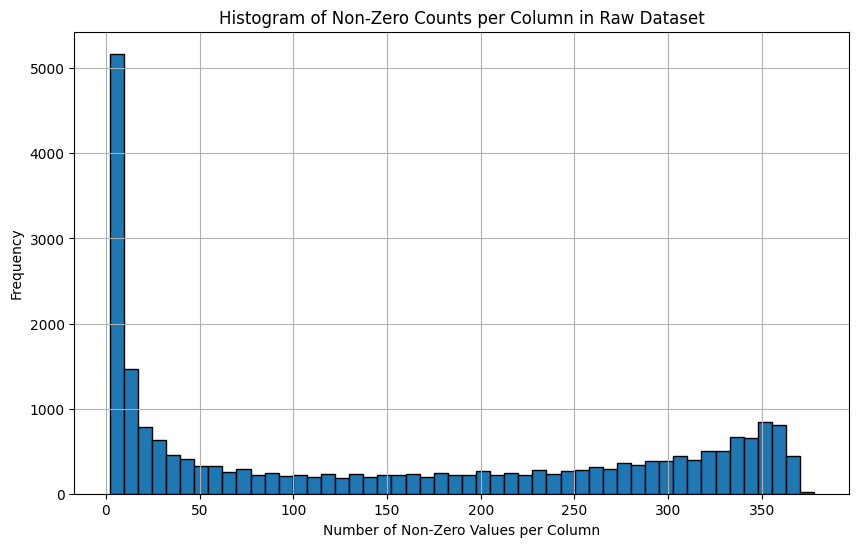

In [57]:
non_zero_counts_per_column = (mcf7_smartS_raw != 0).sum(axis=0)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(non_zero_counts_per_column, bins=50, edgecolor='black')
plt.title('Histogram of Non-Zero Counts per Column in Raw Dataset')
plt.xlabel('Number of Non-Zero Values per Column')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

C:\Users\pizzzauiia\AppData\Local\Temp\ipykernel_9416\2169171464.py:16: RuntimeWarning:

invalid value encountered in divide



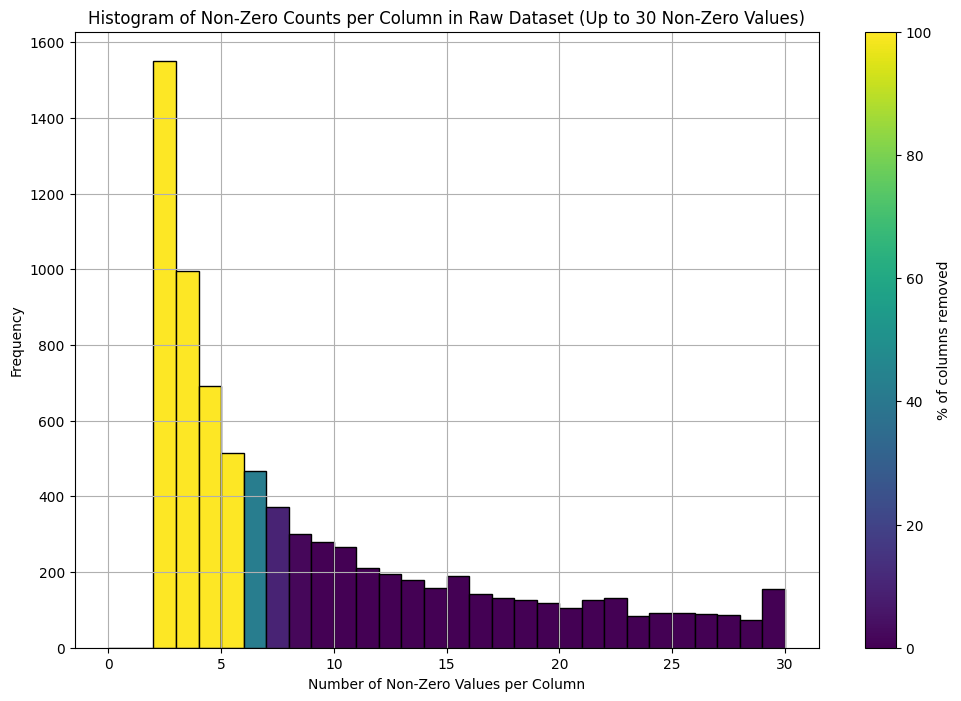

In [65]:

# Count the number of non-zero values in each column for the raw and filtered datasets
non_zero_counts_raw = (mcf7_smartS_raw != 0).sum(axis=0)
non_zero_counts_filt = (mcf7_smartS_filt != 0).sum(axis=0)

# Filter out columns with more than 30 non-zero values
filtered_non_zero_counts_raw = non_zero_counts_raw[non_zero_counts_raw <= 30]

# Identify columns removed
removed_columns = set(non_zero_counts_raw.index) - set(non_zero_counts_filt.index)

# Calculate histogram data for filtered raw dataset
hist, bins = np.histogram(filtered_non_zero_counts_raw, bins=30, range=(0, 30))

# Calculate the percentage of columns removed for each bin
removed_counts_per_bin = np.histogram([non_zero_counts_raw[col] for col in removed_columns if non_zero_counts_raw[col] <= 30], bins=bins)[0]
percentage_removed_per_bin = (removed_counts_per_bin / hist) * 100

# Plot the histogram with colored bars
plt.figure(figsize=(12, 8))

# Normalize the percentages to [0, 1] range for colormap
norm = plt.Normalize(0, 100)
colors = plt.cm.viridis(norm(percentage_removed_per_bin))

for i in range(len(hist)):
    plt.bar(bins[i], hist[i], width=bins[i+1]-bins[i], color=colors[i], edgecolor='black', align='edge')

cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='viridis'), ax=plt.gca())
cbar.set_label('% of columns removed')

plt.title('Histogram of Non-Zero Counts per Column in Raw Dataset (Up to 30 Non-Zero Values)')
plt.xlabel('Number of Non-Zero Values per Column')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


We see that every column with that characteristic was removed, because every column of the filtered dataset has that characteristic. But as we can see in the next cell code, there are still some columns that were removed but had more than 5 nonzero values.

In [15]:
# Count the number of non-zero values in each column
non_zero_counts = (mcf7_smartS_raw != 0).sum(axis=0)

# Count columns with more than 5 non-zero values
columns_with_more_than_5_non_zeros = (non_zero_counts > 5).sum()

# Display the result
print("Number of columns with more than 5 non-zero values:", columns_with_more_than_5_non_zeros)
print("Columns remaining to check:",columns_with_more_than_5_non_zeros - mcf7_smartS_filt.shape[1])

Number of columns with more than 5 non-zero values: 19182
Columns remaining to check: 237


There are indeed 237 columns that were removed for other reasons. We now print their indexes and take a look at them.

In [16]:

# Identify Columns Not Removed
columns_not_removed = mcf7_smartS_raw.columns.intersection(mcf7_smartS_filt.columns)

# Count the number of non-zero values in each column in the raw dataset
non_zero_counts = (mcf7_smartS_raw != 0).sum(axis=0)

# Identify columns with more than 5 non-zero values
columns_with_more_than_5_non_zeros = non_zero_counts[non_zero_counts > 5].index


# Find columns that meet both criteria
diff_df = columns_with_more_than_5_non_zeros.difference(columns_not_removed)

print(diff_df.shape)

np.set_printoptions(threshold=np.inf)

# Extract the sub-dataset containing these columns
sub_dataset = mcf7_smartS_raw[diff_df]

# Generate and display the description of the sub-dataset
sub_dataset_description = sub_dataset.describe()

# Display the resulting columns
print("Columns removed with more than 5 non-zero values:")
print(diff_df.to_numpy())

# Display the description of the sub-dataset
# print(sub_dataset_description)
#print(sub_dataset)


(237,)
Columns removed with more than 5 non-zero values:
['A2M' 'A2ML1' 'ABCC13' 'ABHD12B' 'ADIPOQ' 'ADM-DT' 'AJAP1' 'ALOX15P1'
 'AMDHD1' 'AMPH' 'ANGPT4' 'ANKLE1' 'AOC1' 'AQP8' 'ARAP3' 'ARG1'
 'ARHGEF18-AS1' 'ARL9' 'ASAP1-IT2' 'BACH1-AS1' 'BANK1' 'BATF2' 'BMS1P3'
 'C17orf50' 'C3orf35' 'CA5A' 'CABP1' 'CACNA1A' 'CALD1' 'CCBE1' 'CCN3'
 'CD70' 'CELF3' 'CELF4' 'CES3' 'CHMP4BP1' 'CHRNG' 'COLGALT2' 'CPB2-AS1'
 'CPLX3' 'CUX2' 'CYP2F1' 'DAND5' 'DDC' 'DDR1-DT' 'DDX10P2' 'DHX58'
 'DNAH12' 'DNAJC8P1' 'DPP3P1' 'ELMOD1' 'ENPP3' 'EPO' 'EPSTI1' 'EYS'
 'FAM135A' 'FAM71F2' 'FER1L6' 'FER1L6-AS2' 'FEZF1-AS1' 'FNDC8' 'FST'
 'FTH1P1' 'GAPDHP39' 'GOLGA8R' 'GOSR2-DT' 'GPR150' 'GZMM' 'H3P42' 'HHIP'
 'HLA-DQA2' 'HLA-S' 'HMGA1P3' 'HMGB1P26' 'HMGN2P23' 'HMX3' 'HNRNPA1P35'
 'HNRNPA3P9' 'HOXB-AS1' 'HSPB6' 'HSPE1P6' 'HSPE1P7' 'HTR2B' 'IGF2-AS'
 'IGLL3P' 'IGLV1-51' 'IPCEF1' 'IQGAP2' 'ITGA1' 'ITGB7' 'ITIH4' 'KCNC1'
 'KIF26B' 'KLF1' 'KLHL6' 'KLRG1' 'KRT37' 'LARP1P1' 'LCN2' 'LINC00310'
 'LINC00572' 'LINC00661' 'LINC0096

By looking at some of them, we noticed that they have very sparse columns. Since the filtered dataset had 70 rows less than the raw one, it is possible that the procedure explained before was performed after the removal of the rows. Hence that the removal of the rows had happend before the one of the columns. The following code checks that

In [17]:

# Identify rows that were removed
removed_rows = mcf7_smartS_raw.index.difference(mcf7_smartS_filt.index)

# Create a new version of the raw dataset with those rows removed
raw_without_removed_rows = mcf7_smartS_raw.drop(index=removed_rows)

# Count the number of non-zero values in each column of the new dataset
non_zero_counts_after_row_removal = (raw_without_removed_rows != 0).sum(axis=0)

# Identify columns that had more than 5 non-zero values in the original raw dataset
non_zero_counts_original = (mcf7_smartS_raw != 0).sum(axis=0)
columns_with_more_than_5_non_zeros_original = non_zero_counts_original[non_zero_counts_original > 5].index

# Identify columns with more than 5 non-zero values in the new dataset (after row removal)
columns_with_more_than_5_non_zeros_after_row_removal = non_zero_counts_after_row_removal[non_zero_counts_after_row_removal > 5].index

# Find columns that were removed but had more than 5 non-zero values in the original dataset
diff_df = columns_with_more_than_5_non_zeros_original.difference(mcf7_smartS_filt.columns)

# Check which of these columns have less than or equal to 5 non-zero values after row removal
columns_with_less_or_equal_5_after_row_removal = non_zero_counts_after_row_removal[diff_df]
columns_removed_due_to_row_removal = columns_with_less_or_equal_5_after_row_removal[columns_with_less_or_equal_5_after_row_removal <= 5].index

# Display the result
print("Columns that were removed and had more than 5 non-zero values originally:")
print(diff_df.to_numpy())

print("Columns from above that have less than or equal to 5 non-zero values after row removal:")
print(columns_removed_due_to_row_removal.to_numpy())

# Validate hypothesis
hypothesis_correct = (diff_df.to_numpy().tolist() == columns_removed_due_to_row_removal.to_numpy().tolist())
print("Is the hypothesis correct?", hypothesis_correct)


Columns that were removed and had more than 5 non-zero values originally:
['A2M' 'A2ML1' 'ABCC13' 'ABHD12B' 'ADIPOQ' 'ADM-DT' 'AJAP1' 'ALOX15P1'
 'AMDHD1' 'AMPH' 'ANGPT4' 'ANKLE1' 'AOC1' 'AQP8' 'ARAP3' 'ARG1'
 'ARHGEF18-AS1' 'ARL9' 'ASAP1-IT2' 'BACH1-AS1' 'BANK1' 'BATF2' 'BMS1P3'
 'C17orf50' 'C3orf35' 'CA5A' 'CABP1' 'CACNA1A' 'CALD1' 'CCBE1' 'CCN3'
 'CD70' 'CELF3' 'CELF4' 'CES3' 'CHMP4BP1' 'CHRNG' 'COLGALT2' 'CPB2-AS1'
 'CPLX3' 'CUX2' 'CYP2F1' 'DAND5' 'DDC' 'DDR1-DT' 'DDX10P2' 'DHX58'
 'DNAH12' 'DNAJC8P1' 'DPP3P1' 'ELMOD1' 'ENPP3' 'EPO' 'EPSTI1' 'EYS'
 'FAM135A' 'FAM71F2' 'FER1L6' 'FER1L6-AS2' 'FEZF1-AS1' 'FNDC8' 'FST'
 'FTH1P1' 'GAPDHP39' 'GOLGA8R' 'GOSR2-DT' 'GPR150' 'GZMM' 'H3P42' 'HHIP'
 'HLA-DQA2' 'HLA-S' 'HMGA1P3' 'HMGB1P26' 'HMGN2P23' 'HMX3' 'HNRNPA1P35'
 'HNRNPA3P9' 'HOXB-AS1' 'HSPB6' 'HSPE1P6' 'HSPE1P7' 'HTR2B' 'IGF2-AS'
 'IGLL3P' 'IGLV1-51' 'IPCEF1' 'IQGAP2' 'ITGA1' 'ITGB7' 'ITIH4' 'KCNC1'
 'KIF26B' 'KLF1' 'KLHL6' 'KLRG1' 'KRT37' 'LARP1P1' 'LCN2' 'LINC00310'
 'LINC00572' 'LIN

As we can see, this is the case. Now we need to understand how were those 70 rows removed.

In [18]:
# Identify rows that were removed
removed_rows = mcf7_smartS_raw.index.difference(mcf7_smartS_filt.index)

# Print the indexes of the removed rows
print("Indexes of the removed rows:")
print(removed_rows.to_numpy())


Indexes of the removed rows:
['output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam'
 'output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam'
 'output.STAR.1_A7_Hypo_S25_Aligned.sortedByCoord.out.bam'
 'output.STAR.1_A8_Hypo_S26_Aligned.sortedByCoord.out.bam'
 'output.STAR.1_A9_Hypo_S27_Aligned.sortedByCoord.out.bam'
 'output.STAR.1_B10_Hypo_S76_Aligned.sortedByCoord.out.bam'
 'output.STAR.1_B1_Norm_S49_Aligned.sortedByCoord.out.bam'
 'output.STAR.1_B2_Norm_S50_Aligned.sortedByCoord.out.bam'
 'output.STAR.1_B3_Norm_S51_Aligned.sortedByCoord.out.bam'
 'output.STAR.1_B9_Hypo_S75_Aligned.sortedByCoord.out.bam'
 'output.STAR.1_C3_Norm_S99_Aligned.sortedByCoord.out.bam'
 'output.STAR.1_C7_Hypo_S121_Aligned.sortedByCoord.out.bam'
 'output.STAR.1_C8_Hypo_S122_Aligned.sortedByCoord.out.bam'
 'output.STAR.1_C9_Hypo_S123_Aligned.sortedByCoord.out.bam'
 'output.STAR.1_D10_Hypo_S172_Aligned.sortedByCoord.out.bam'
 'output.STAR.1_D12_Hypo_S174_Aligned.sortedByCoord.out.bam'
 'output.STAR.1_D1_

In [19]:

# Identify rows that were removed
removed_rows = mcf7_smartS_raw.index.difference(mcf7_smartS_filt.index)

# Select the removed rows from the raw dataset
removed_rows_data = mcf7_smartS_raw.loc[removed_rows]

# Calculate the sum of inputs in each row for the removed rows
removed_rows_sum = removed_rows_data.sum(axis=1)

# Print the sums of the removed rows
print("Sum of inputs in each row for the removed rows:")
print(removed_rows_sum.to_numpy())


Sum of inputs in each row for the removed rows:
[    281   23499   51389   22704   87386 2287165  131367  128171  208267
     129  160882  103751  127574    9790  239896  564282  152337  170166
   77094    7366      19   73412     242   45972  110173   94119   69725
  106668  180121     157   96688   98198   38467   28803   76280      13
    4701  174355   78657  114469     887   22769  122182       1   14645
   99079      22    2267    6013 2069263     113 2162257 2308057    6201
 1196909      36   36673  871703    1519    8773     153     422      30
  595098  817482    8941   70269 1302612    6572  795636]


In [20]:


# Calculate the sum of inputs in each row for the filtered dataset
filtered_rows_sum = mcf7_smartS_filt.sum(axis=1)

# Print the sums of the rows present in the filtered dataset
print("Sum of inputs in each row for the filtered dataset:")
print(filtered_rows_sum.to_numpy())



Sum of inputs in each row for the filtered dataset:
[ 936059 1982038  333237 1289120 1728927 1439437 1545461 1616084  940724
  310372 1559136 1298616  388450 1106482  776727 1427685 1533968  293995
  534204  285546 1521105 1429833  943291  461056 1099121  760684  451975
  761218 1416180  263343  773248  266752 1375304  268894  644286 1229842
 1775947  819236  470831  374756  805460 1393651 1244028 1505568  382918
 1265938  659712 1822649 1265845 1801662 1606844 1590490 1164751  923967
 1385844 1509423 1563203 1916212 1354593 1853247 1852260 1190040 1085533
 1604592 1550826 1717389 1090990  985759 1043203 1734426 1840082 1374320
 1639861 1770634 1580080 1473480 1666952 1352802 1470531  957652 1814330
 1666022 1414220 1255645 1547154 1625442  432363 1045592 1618615 1724182
 1970851  334200  318188 1559445 1504638 1472393 1469857 1665543 1904769
 1488396  897753  973800 1617331 1365857 1570662 1679923 1605773 1610803
 1661102 1361039 1391606 1446626 1232708  862168  604070  597671 1754394

In [21]:
# Identify rows that were removed
removed_rows = mcf7_smartS_raw.index.difference(mcf7_smartS_filt.index)

# Select the removed rows from the raw dataset
removed_rows_data = mcf7_smartS_raw.loc[removed_rows]

# Compute the number of nonzero values in each row for the removed rows
removed_rows_nonzero_count = (removed_rows_data != 0).sum(axis=1)

# Print the number of nonzero values for each row in the removed ones
print("Number of nonzero values for each row in the removed ones:")
print(removed_rows_nonzero_count.to_numpy())


Number of nonzero values for each row in the removed ones:
[  188  4739  6549  4594  5945  9307  8829  8571  8153    58  9010  7997
  7856  3105  8567  2778  8614  8956  7757  3166     7  6379   199  6663
  8022  8390  6242  7438  7573   132  8143  8090  5148  5013  6625    13
  2200  8035  6863  8380   574  4617  7389     1  3976  7598    22  1120
  2195  8362    86  6745  6932  2620 12519    33  5260 12504  1025  3321
    98    97    27  2636  3953  2979  3744  9619  3577  1975]


In [22]:


# Compute the number of nonzero values in each row for the non-removed rows
non_removed_rows_nonzero_count = (mcf7_smartS_filt != 0).sum(axis=1)

# Print the number of nonzero values for each row in the non-removed ones
print("Number of nonzero values for each row in the non-removed ones:")
print(non_removed_rows_nonzero_count.to_numpy())

print(min(non_removed_rows_nonzero_count))


Number of nonzero values for each row in the non-removed ones:
[ 8664  6433 10007  9778 10598 11663 10584  9623 10546  8863 10892 11254
  9066 10324  7986  9791 10020  9846  9571  8436  9349 10597  9717 10436
 10031  9516  7478 10085 10648  9533  9758  8161  8872  8855 10131 11050
 10709 10160  7938  9073  7768  9971  8940  8900  9810 10663  9029  8905
  9586  7481 10478 10641 11779 11243 11027 10919  9796  8277  7017  9014
  8257 11294 11780 10282 10686 10124 12217  9689 10303  9451  8936 11108
 11910 10425 10995 11196 11040 10748 10840 10953 10629 10208 11432 11822
 10539  9661  9136  8308  9605 10067  8471  9218  9601 11042  9818 11102
 10486  8916  8869 10231 11052 10698  5527 11868 10391 10889 10740 10093
  9980 10203 10384  8963 10253  8199  9866 10617 10209  9224 11420 11125
 11918  8432  9865  8482  9780 10697 10015  9851 10339 10890 11805 11342
  6416 10738  9165  9978  8959  8846 10392 11060 10761 11985  9515 10650
 10264  7807 10150  7051  5974 11312 11407 10598 10711 10519 

In [23]:
def filter_columns(df, min_nonzero=5):
    """Remove columns with less than or equal to `min_nonzero` nonzero values."""
    non_zero_counts = (df != 0).sum(axis=0)
    filtered_df = df.loc[:, non_zero_counts > min_nonzero]
    return filtered_df

def filter_rows(df, min_nonzero=5321):
    """Remove rows with less than `min_nonzero` nonzero values."""
    non_zero_counts = (df != 0).sum(axis=1)
    filtered_df = df.loc[non_zero_counts >= min_nonzero, :]
    return filtered_df

def iterative_filtering(df, column_threshold=5, row_threshold=5321):
    """Iteratively filter the dataset based on column and row nonzero counts."""
    previous_shape = None
    
    while df.shape != previous_shape:
        previous_shape = df.shape
        df = filter_columns(df, column_threshold)
        df = filter_rows(df, row_threshold)
    
    return df

# Apply iterative filtering
filtered_dataset = iterative_filtering(mcf7_smartS_raw)

# Save the final filtered dataset to a new CSV file (optional)
filtered_dataset.to_csv('filtered_dataset.csv', index=False)

# Print the shape of the final filtered dataset
print("Final filtered dataset shape:", filtered_dataset.shape)

# Display the first few rows of the final filtered dataset
print(filtered_dataset.head())


Final filtered dataset shape: (347, 19081)
                                                    WASH7P  MIR6859-1  WASH9P  \
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...       0          0       1   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...       0          0       0   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....       0          0       0   
output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord....       0          0       1   
output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord....       0          0      10   

                                                    OR4F29  MTND1P23  \
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...       0         0   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...       0         0   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....       0         0   
output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord....       0         0   
output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord....       0         0   

                                     

In [24]:
# Compute the number of nonzero values in each row for the non-removed rows
non_removed_rows_nonzero_count = (mcf7_smartS_raw != 0).sum(axis=1)

# Print the number of nonzero values for each row in the non-removed ones
print("Number of nonzero values for each row in the non-removed ones:")
print(non_removed_rows_nonzero_count.to_numpy())

Number of nonzero values for each row in the non-removed ones:
[ 8676   188  6448  4739 10019  9796 10648 11690 10618  6549  4594  5945
  9307  9646 10581  8829  8571  8153  8871 10922 11283  9082 10371    58
  8007  9822 10051  9864  9585  9010  8448  9371 10637  7997  7856  3105
  8567  9737  2778  8614  8956  7757 10467 10053  3166  9533     7  7481
  6379 10105 10703   199  9543  9776  6663  8022  8390  6242  7438  7573
   132  8179  8909  8143  8090  8865 10167 11093 10743  5148  5013 10194
  7952  6625    13  2200  8035  6863  8380   574  9086  4617  7792  7389
  9999  8962  8927     1  3976  7598  9829    22 10703  1120  2195  9044
  8945  9622  7508 10526 10694 11832 11265 11065 10940  9838  8362  8308
  7068  9052  8281 11347 11812 10326 10730 10147 12260  9712    86 10337
  9492  8961  6745 11143 11968 10457 11043 11229 11095  6932 10784 10892
 10989 10673 10242 11483 11884 10584  9699  2620 12519  9154    33  8328
  9634 10111  8520  9234  9623 11087  9860 11130 10547  8948 

In [25]:


# Identify duplicated rows
duplicated_rows = mcf7_smartS_raw[mcf7_smartS_raw.duplicated()]

# Print the duplicated rows
print("Duplicated rows in the raw dataset:")
print(duplicated_rows)


Duplicated rows in the raw dataset:
Empty DataFrame
Columns: [WASH7P, MIR6859-1, WASH9P, OR4F29, MTND1P23, MTND2P28, MTCO1P12, MTCO2P12, MTATP8P1, MTATP6P1, MTCO3P12, OR4F16, CICP3, LINC01409, FAM87B, LINC01128, LINC00115, LINC02593, SAMD11, NOC2L, KLHL17, PLEKHN1, PERM1, HES4, ISG15, AGRN, RNF223, C1orf159, MIR429, TTLL10, TNFRSF18, SDF4, B3GALT6, C1QTNF12, UBE2J2, LINC01786, SCNN1D, ACAP3, MIR6726, PUSL1, INTS11, MIR6727, CPTP, TAS1R3, DVL1, MIR6808, MXRA8, AURKAIP1, CCNL2, MRPL20-AS1, MRPL20, RN7SL657P, MRPL20-DT, LINC01770, VWA1, ATAD3C, ATAD3B, ATAD3A, SSU72, FNDC10, MIB2, CDK11B, SLC35E2B, MMP23A, CDK11A, SLC35E2A, NADK, GNB1, CALML6, TMEM52, CFAP74, GABRD, PRKCZ, PRKCZ-AS1, FAAP20, SKI, MORN1, RER1, PEX10, PLCH2, PANK4, TNFRSF14, PRXL2B, MMEL1, PRDM16-DT, PRDM16, ARHGEF16, MEGF6, TPRG1L, WRAP73, TP73, TP73-AS3, TP73-AS1, CCDC27, SMIM1, LRRC47, RN7SL574P, CEP104, DFFB, C1orf174, ...]
Index: []

[0 rows x 22934 columns]


In [26]:

# Transpose the dataset to treat columns as rows
transposed_raw = mcf7_smartS_raw.T

# Identify duplicated columns (now treated as rows)
duplicated_columns = transposed_raw[transposed_raw.duplicated()]

# Get the original names of the duplicated columns
duplicated_column_names = duplicated_columns.index

# Print the duplicated columns
print("Duplicated columns in the raw dataset:")
print(duplicated_column_names)


Duplicated columns in the raw dataset:
Index(['KLF2P3', 'UGT1A9', 'SLC22A14', 'COQ10BP2', 'LAP3P2', 'GALNT17', 'PON1',
       'MIR664B', 'KCNS2', 'MIR548D1', 'STRA6LP', 'MUC6', 'LINC00595',
       'CACYBPP1', 'KNOP1P1', 'WDR95P', 'MIR19B1', 'RNU6-539P', 'SNURF',
       'RBFOX1', 'ASPA', 'BCL6B', 'CCL3L1', 'OTOP3', 'RNA5SP450', 'PSG1',
       'MIR3191', 'SEZ6L', 'ADAMTS5'],
      dtype='object')


In [27]:
# Transpose the dataset to treat columns as rows
transposed_filt = mcf7_smartS_filt.T

# Identify duplicated columns (now treated as rows)
duplicated_columns = transposed_filt[transposed_filt.duplicated()]

# Get the original names of the duplicated columns
duplicated_column_names = duplicated_columns.index

# Print the duplicated columns
print("Duplicated columns in the filt dataset:")
print(duplicated_column_names)

Duplicated columns in the filt dataset:
Index(['UGT1A9', 'LAP3P2', 'STRA6LP', 'LINC00595', 'CCL3L1'], dtype='object')


In [28]:

# Count the number of non-zero values in each row
non_zero_counts_per_row = (mcf7_smartS_raw != 0).sum(axis=1)

# Identify rows with strictly less than 6 non-zero values
rows_with_less_than_6_non_zeros = mcf7_smartS_raw[non_zero_counts_per_row < 7895]

# Display the result
print("Number of rows with strictly less than 6 non-zero values:", rows_with_less_than_6_non_zeros.shape[0])
print("First few rows with strictly less than 6 non-zero values:")
#print(rows_with_less_than_6_non_zeros.head())


Number of rows with strictly less than 6 non-zero values: 70
First few rows with strictly less than 6 non-zero values:


In [29]:

# Identify Rows Removed
rows_removed = mcf7_smartS_raw.loc[~mcf7_smartS_raw.index.isin(mcf7_smartS_filt.index)]

# Count the number of non-zero values in each row in the raw dataset
non_zero_counts_per_row = (mcf7_smartS_raw != 0).sum(axis=1)

# Identify rows with strictly less than 6 non-zero values
rows_with_less_than_6_non_zeros = mcf7_smartS_raw[non_zero_counts_per_row < 7895]

print(len(rows_with_less_than_6_non_zeros))

# Find the intersection of these rows with the rows removed
intersection_rows = rows_with_less_than_6_non_zeros.index.intersection(rows_removed.index)

# Display the result
print("Number of rows with strictly less than 6 non-zero values that were also removed:", len(intersection_rows))
print("First few rows in the intersection:")
print(mcf7_smartS_raw.loc[intersection_rows].head())


70
Number of rows with strictly less than 6 non-zero values that were also removed: 51
First few rows in the intersection:
                                                    WASH7P  MIR6859-1  WASH9P  \
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoor...       0          0       0   
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord....       0          0       0   
output.STAR.1_A7_Hypo_S25_Aligned.sortedByCoord...       0          0       0   
output.STAR.1_A8_Hypo_S26_Aligned.sortedByCoord...       0          0       0   
output.STAR.1_A9_Hypo_S27_Aligned.sortedByCoord...       0          0       0   

                                                    OR4F29  MTND1P23  \
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoor...       0         0   
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord....       0         0   
output.STAR.1_A7_Hypo_S25_Aligned.sortedByCoord...       0         0   
output.STAR.1_A8_Hypo_S26_Aligned.sortedByCoord...       0         0   
output.STAR.1_A9_Hypo_S27_Alig

In [30]:
non_zero_counts_per_row = (mcf7_smartS_raw != 0).sum(axis=1)
pierino = (mcf7_smartS_raw).sum(axis=1)

pierino.describe()


count    3.830000e+02
mean     9.946119e+05
std      5.503732e+05
min      1.000000e+00
25%      5.987505e+05
50%      1.129334e+06
75%      1.408638e+06
max      2.308057e+06
dtype: float64

In [31]:
non_zero_counts_per_row.describe()

count      383.000000
mean      9124.219321
std       2693.309249
min          1.000000
25%       8456.500000
50%       9907.000000
75%      10789.000000
max      12519.000000
dtype: float64

### Now we need to understand the passage from the filtered dataset to the filtered and normalized one, that is the normalization process

In [32]:
rows_removed = mcf7_smartS_filt.loc[~mcf7_smartS_filt.index.isin(mcf7_smartS_filn.index)]

# Step 2: Compare Columns
columns_removed = mcf7_smartS_filt.columns.difference(mcf7_smartS_filn.columns).tolist()


# Display Results
print("Rows Removed:", len(rows_removed))
print("Columns Removed:", len(columns_removed))
print("\nColumns Removed:")
print(columns_removed)  # Display the removed columns

Rows Removed: 63
Columns Removed: 15945

Columns Removed:
['A1BG', 'A1BG-AS1', 'AAAS', 'AACS', 'AADAT', 'AAGAB', 'AAK1', 'AAMDC', 'AAMP', 'AAR2', 'AARD', 'AARSD1', 'AARSD1P1', 'AASDH', 'AASDHPPT', 'AASS', 'AATF', 'AATK', 'ABALON', 'ABCA10', 'ABCA11P', 'ABCA17P', 'ABCA5', 'ABCB10', 'ABCB7', 'ABCB9', 'ABCC11', 'ABCC4', 'ABCC6', 'ABCC6P1', 'ABCC6P2', 'ABCD3', 'ABCD4', 'ABCE1', 'ABCF1', 'ABCF2', 'ABCF2-H2BE1', 'ABCF2P1', 'ABCF3', 'ABCG8', 'ABHD1', 'ABHD10', 'ABHD11', 'ABHD11-AS1', 'ABHD12', 'ABHD13', 'ABHD14A', 'ABHD14B', 'ABHD15', 'ABHD15-AS1', 'ABHD16A', 'ABHD16B', 'ABHD17A', 'ABHD17AP1', 'ABHD17AP3', 'ABHD17B', 'ABHD17C', 'ABHD18', 'ABHD2', 'ABHD3', 'ABHD5', 'ABHD6', 'ABHD8', 'ABI1', 'ABI2', 'ABITRAM', 'ABL1', 'ABL2', 'ABLIM2', 'ABR', 'ABRACL', 'ABRAXAS1', 'ABRAXAS2', 'ABT1', 'ABTB1', 'ABTB2', 'ACAA1', 'ACACA', 'ACAD10', 'ACAD11', 'ACAD8', 'ACAD9', 'ACADL', 'ACADM', 'ACADS', 'ACADSB', 'ACADVL', 'ACAP1', 'ACAP2', 'ACAP3', 'ACAT1', 'ACBD3', 'ACBD3-AS1', 'ACBD4', 'ACBD5', 'ACBD6', 'ACBD7',

In [33]:
mcf7_smartS_filt[columns_removed].sum(axis=0).min()

6

In [34]:
mcf7_smartS_filn.sum(axis=0).min()

15

In [35]:

# Calculate the number of non-zero values in each column
non_zero_counts_per_column = (mcf7_smartS_filn != 0).sum(axis=0)

# Convert to a list
non_zero_counts_list = non_zero_counts_per_column.tolist()

# Find the minimum value and its index
min_value = min(non_zero_counts_list)
min_index = non_zero_counts_list.index(min_value)

# Get the column name corresponding to the minimum index
min_column_name = non_zero_counts_per_column.index[min_index]

# Print the results
print("Min value is:", min_value)
print("Index of the min value:", min_index)
print("Column name with the min value:", min_column_name)

# Display the list of non-zero counts
print("Number of non-zero values per column:", non_zero_counts_list)



Min value is: 2
Index of the min value: 1242
Column name with the min value: CR2
Number of non-zero values per column: [239, 237, 100, 188, 240, 230, 205, 158, 175, 109, 143, 236, 117, 181, 166, 248, 107, 235, 216, 168, 214, 123, 250, 250, 164, 208, 175, 231, 187, 50, 156, 243, 140, 130, 219, 209, 147, 248, 156, 191, 246, 229, 132, 107, 239, 107, 139, 247, 151, 52, 112, 132, 184, 129, 145, 232, 176, 179, 244, 91, 150, 201, 128, 237, 214, 235, 117, 232, 110, 102, 233, 212, 191, 196, 243, 226, 139, 127, 213, 131, 245, 153, 65, 41, 191, 239, 156, 243, 232, 117, 60, 117, 41, 249, 239, 128, 159, 207, 79, 135, 216, 189, 147, 248, 90, 250, 97, 234, 174, 227, 93, 90, 100, 250, 53, 149, 127, 166, 244, 55, 130, 242, 229, 104, 161, 29, 170, 207, 98, 156, 211, 141, 151, 111, 111, 246, 145, 248, 114, 83, 177, 180, 155, 184, 227, 143, 146, 119, 134, 34, 228, 114, 100, 221, 228, 200, 250, 245, 247, 249, 244, 219, 241, 250, 248, 105, 194, 234, 204, 250, 236, 168, 209, 217, 169, 243, 65, 24, 248, 191, 

In [36]:
# Count the number of non-zero values in each column in the raw dataset
non_zero_counts_per_column = (mcf7_smartS_filt != 0).sum(axis=0)

# Identify columns with more than 5 non-zero values
columns_with_more_than_5_non_zeros = non_zero_counts_per_column[non_zero_counts_per_column > 5].index

# Find the intersection of these columns with the columns of the filtered dataset
common_columns = columns_with_more_than_5_non_zeros.intersection(mcf7_smartS_filn.columns)

# Create a new DataFrame based on the intersection of columns
df_inters = mcf7_smartS_filn[common_columns]

# Compare the shapes
is_hypothesis_correct = df_inters.shape[1] == mcf7_smartS_filn.shape[1]

# Display the result
print("Is the hypothesis correct?", is_hypothesis_correct)
print("Shape of the filtered dataset:", mcf7_smartS_filn.shape)
print("Shape of the intersection dataset:", df_inters.shape)

Is the hypothesis correct? True
Shape of the filtered dataset: (250, 3000)
Shape of the intersection dataset: (250, 3000)


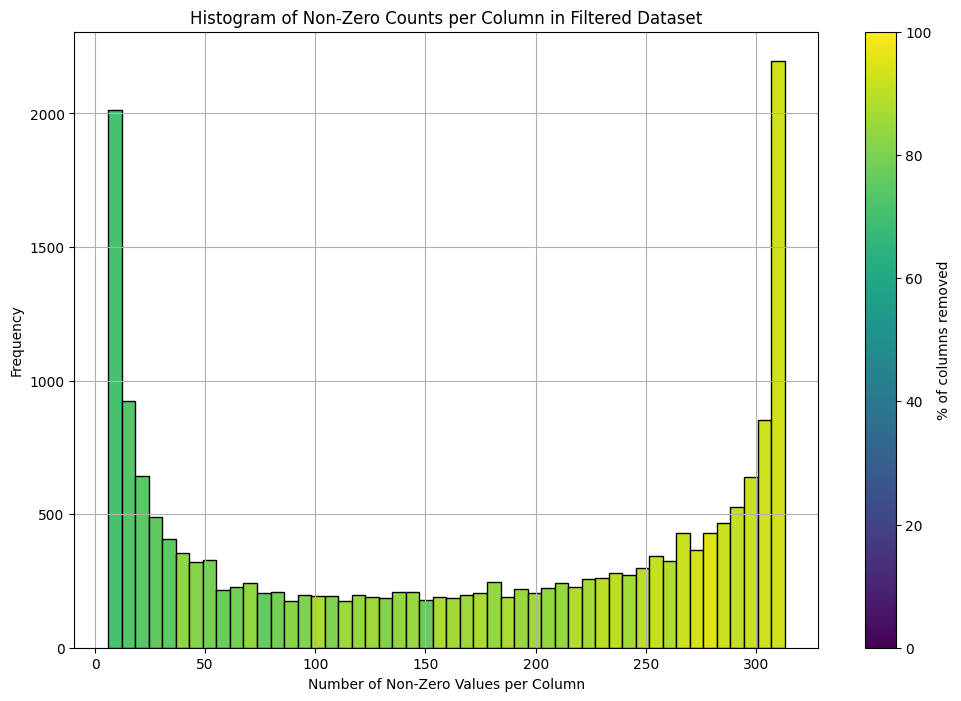

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming mcf7_smartS_filt and mcf7_smartS_filn are your filtered and filtered+normalized dataset DataFrames

# Count the number of non-zero values in each column for the filtered and filtered+normalized datasets
non_zero_counts_filt = (mcf7_smartS_filt != 0).sum(axis=0)
non_zero_counts_filn = (mcf7_smartS_filn != 0).sum(axis=0)

# Identify columns removed after normalization
removed_columns = set(non_zero_counts_filt.index) - set(non_zero_counts_filn.index)

# Calculate histogram data for filtered dataset
hist, bins = np.histogram(non_zero_counts_filt, bins=50)

# Calculate the percentage of columns removed for each bin
removed_counts_per_bin = np.histogram([non_zero_counts_filt[col] for col in removed_columns], bins=bins)[0]
percentage_removed_per_bin = (removed_counts_per_bin / hist) * 100

# Plot the histogram with colored bars
plt.figure(figsize=(12, 8))

# Normalize the percentages to [0, 1] range for colormap
norm = plt.Normalize(0, 100)
colors = plt.cm.viridis(norm(percentage_removed_per_bin))

for i in range(len(hist)):
    plt.bar(bins[i], hist[i], width=bins[i+1]-bins[i], color=colors[i], edgecolor='black', align='edge')

cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='viridis'), ax=plt.gca())
cbar.set_label('% of columns removed')

plt.title('Histogram of Non-Zero Counts per Column in Filtered Dataset')
plt.xlabel('Number of Non-Zero Values per Column')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [37]:
# Count the number of non-zero values in each column
non_zero_counts = (mcf7_smartS_filt != 0).sum(axis=0)

# Count columns with more than 5 non-zero values
columns_with_more_than_5_non_zeros = (non_zero_counts > 5).sum()

# Display the result
print("Number of columns with more than 5 non-zero values:", columns_with_more_than_5_non_zeros)
print("Columns remaining to check:",columns_with_more_than_5_non_zeros - mcf7_smartS_filn.shape[1])

Number of columns with more than 5 non-zero values: 18945
Columns remaining to check: 15945


In [68]:
#it may be that the normalization has happened line per line. Hence we want to check if our hypotesis
# is correct by checking it.
#in the next line we define a new dataframe that comes from the filtered dataset
# and has just the entries that have the same column and row indices as the filtered/normalized dataset.

df_inters = mcf7_smartS_filt.loc[mcf7_smartS_filn.index, mcf7_smartS_filn.columns]
#print(df_inters.shape == mcf7_smartS_filn.shape)
#now we print the full row of the new dataset corresponding to the row output.STAR.2_B7_Hypo_S79_Aligned.sortedByCoord.out.bam
print((mcf7_smartS_filt.loc["output.STAR.2_B7_Hypo_S79_Aligned.sortedByCoord.out.bam", :]). describe())
print((df_inters.loc["output.STAR.2_B7_Hypo_S79_Aligned.sortedByCoord.out.bam", :]).describe())
# we do the same for the filtered dataset
#print((mcf7_smartS_filn.loc["output.STAR.2_B7_Hypo_S79_Aligned.sortedByCoord.out.bam", :]). describe())
#now we divide one for the other to see if the ratio is constant. we also put a command to avoid the printing to be truncated in the middle
#np.set_printoptions(threshold=np.inf)
#the command did not work, we try now with the following

print(df_inters.loc["output.STAR.2_B7_Hypo_S79_Aligned.sortedByCoord.out.bam", :])
# we do the same for the filtered dataset
print(mcf7_smartS_filn.loc["output.STAR.2_B7_Hypo_S79_Aligned.sortedByCoord.out.bam", :])
pd.set_option('display.max_rows', 20)

print(( df_inters.loc["output.STAR.2_B7_Hypo_S79_Aligned.sortedByCoord.out.bam", :] / mcf7_smartS_filn.loc["output.STAR.2_B7_Hypo_S79_Aligned.sortedByCoord.out.bam", :]).describe())


#print( mcf7_smartS_filn.loc["output.STAR.2_B7_Hypo_S79_Aligned.sortedByCoord.out.bam", :] / df_inters.loc["output.STAR.2_B7_Hypo_S79_Aligned.sortedByCoord.out.bam", :])
#now we compute the sum of the entries in the same row of the filtered dataset
#print(mcf7_smartS_filn.loc["output.STAR.2_B7_Hypo_S79_Aligned.sortedByCoord.out.bam", :].sum())
# now we compute the entries for both rows corresponding to the column "SLITRK4"
#print(mcf7_smartS_filn.loc["output.STAR.2_B7_Hypo_S79_Aligned.sortedByCoord.out.bam", "GAPDH"])
#print(df_inters.loc["output.STAR.2_B7_Hypo_S79_Aligned.sortedByCoord.out.bam", "GAPDH"])
# we want to check if the line in the second dataset has been obtained by dividing the line in the first dataset by the standard deviation of the line in the first dataset, followed by a truncation to the nearest integer
#we do it for the whole line, in the following piece of code:
assumed_line = round((df_inters.loc["output.STAR.2_B7_Hypo_S79_Aligned.sortedByCoord.out.bam", :]) / (np.sqrt(0.001*((df_inters.loc["output.STAR.2_B7_Hypo_S79_Aligned.sortedByCoord.out.bam", :].std())))))
print((0.001*np.sqrt((df_inters.loc["output.STAR.2_B7_Hypo_S79_Aligned.sortedByCoord.out.bam", :].std()))))
print(assumed_line)

count    18945.000000
mean        52.032674
std        453.889274
min          0.000000
25%          0.000000
50%          1.000000
75%         33.000000
max      29372.000000
Name: output.STAR.2_B7_Hypo_S79_Aligned.sortedByCoord.out.bam, dtype: float64
count     3000.000000
mean        90.623667
std        679.756247
min          0.000000
25%          0.000000
50%          0.000000
75%         31.250000
max      25422.000000
Name: output.STAR.2_B7_Hypo_S79_Aligned.sortedByCoord.out.bam, dtype: float64
CYP1B1        4779
CYP1B1-AS1    2195
CYP1A1           0
NDRG1          535
DDIT4         2043
              ... 
GRIK5            0
SLC25A27         0
DENND5A         49
CDK5R1           0
FAM13A-AS1       0
Name: output.STAR.2_B7_Hypo_S79_Aligned.sortedByCoord.out.bam, Length: 3000, dtype: int64
CYP1B1        5817
CYP1B1-AS1    2669
CYP1A1           0
NDRG1          654
DDIT4         2484
              ... 
GRIK5            0
SLC25A27         0
DENND5A         60
CDK5R1           0
FAM

In [95]:
#now we want to check the claim through some random rows. In the next line we generate the index of a random row
random_row = np.random.choice(df_inters.index)
print((mcf7_smartS_filn.loc[random_row, :]).describe())
#print(mcf7_smartS_filn.loc[random_row, :])
print("already norm standard deviation")
print(((mcf7_smartS_filn.loc[random_row, :].std())))
#we print the ratio
print( df_inters.loc[random_row, :] / mcf7_smartS_filn.loc[random_row, :])


#now we calculate the assumed line for
print("assumed line")
assumed_line = np.floor((df_inters.loc[random_row, :]) / (np.sqrt(0.001*((df_inters.loc[random_row, :].std())))))
#print(assumed_line)

count     3000.000000
mean       124.566667
std       1064.727752
min          0.000000
25%          0.000000
50%          0.000000
75%         23.000000
max      36928.000000
Name: output.STAR.4_E8_Hypo_S236_Aligned.sortedByCoord.out.bam, dtype: float64
already norm standard deviation
1064.7277517205905
CYP1B1        1.421685
CYP1B1-AS1    1.418524
CYP1A1        1.449960
NDRG1         1.433538
DDIT4         1.418884
                ...   
GRIK5              NaN
SLC25A27           NaN
DENND5A            NaN
CDK5R1             NaN
FAM13A-AS1    1.434783
Name: output.STAR.4_E8_Hypo_S236_Aligned.sortedByCoord.out.bam, Length: 3000, dtype: float64
assumed line


## HCC1806

Now we focus on HCC1806, we visualize the datasets

In [39]:
hcc_smartS_raw

,WASH7P,CICP27,DDX11L17,WASH9P,OR4F29,MTND1P23,MTND2P28,MTCO1P12,MTCO2P12,MTATP8P1,...,MT-TH,MT-TS2,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB,MT-TT,MT-TP,MAFIP
output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam,0,0,0,0,2,250,54,1740,6,1,...,17,5,15,3852,900,22,4208,26,66,0
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam,0,0,0,0,0,424,100,2340,5,1,...,49,29,36,7457,1439,43,6491,62,71,4
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam,0,0,0,0,0,11,0,22,0,0,...,0,0,0,93,12,0,25,0,1,0
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam,0,0,0,0,0,63,16,1020,3,0,...,43,17,8,1479,234,0,4819,11,3,7
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam,0,0,0,0,0,27,3,303,0,0,...,0,0,3,303,33,0,310,4,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
output.STAR.PCRPlate4H10_Normoxia_S210_Aligned.sortedByCoord.out.bam,0,0,0,1,0,146,47,961,1,0,...,25,17,11,2926,423,26,3719,42,48,3
output.STAR.PCRPlate4H11_Normoxia_S214_Aligned.sortedByCoord.out.bam,0,0,0,0,0,37,6,372,0,0,...,2,1,3,688,114,1,984,1,18,0
output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.sortedByCoord.out.bam,0,0,0,1,0,83,30,1128,4,0,...,9,6,23,2999,486,4,2256,15,36,2
output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.sortedByCoord.out.bam,0,0,0,0,0,47,7,258,1,0,...,2,3,3,611,75,4,981,6,8,1


In [40]:
hcc_smartS_filt

,CICP27,DDX11L17,WASH9P,OR4F29,MTND1P23,MTND2P28,MTCO1P12,MTCO2P12,MTATP8P1,MTATP6P1,...,MT-TH,MT-TS2,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB,MT-TT,MT-TP,MAFIP
output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam,0,0,0,2,250,54,1740,6,1,974,...,17,5,15,3852,900,22,4208,26,66,0
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam,0,0,0,0,424,100,2340,5,1,1642,...,49,29,36,7457,1439,43,6491,62,71,4
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam,0,0,0,0,63,16,1020,3,0,653,...,43,17,8,1479,234,0,4819,11,3,7
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam,0,0,0,0,27,3,303,0,0,91,...,0,0,3,303,33,0,310,4,9,0
output.STAR.PCRPlate1A4_Hypoxia_S8_Aligned.sortedByCoord.out.bam,0,1,0,0,81,1,587,0,0,161,...,1,0,0,650,79,3,695,0,14,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
output.STAR.PCRPlate4H10_Normoxia_S210_Aligned.sortedByCoord.out.bam,0,0,1,0,146,47,961,1,0,642,...,25,17,11,2926,423,26,3719,42,48,3
output.STAR.PCRPlate4H11_Normoxia_S214_Aligned.sortedByCoord.out.bam,0,0,0,0,37,6,372,0,0,175,...,2,1,3,688,114,1,984,1,18,0
output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.sortedByCoord.out.bam,0,0,1,0,83,30,1128,4,0,638,...,9,6,23,2999,486,4,2256,15,36,2
output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.sortedByCoord.out.bam,0,0,0,0,47,7,258,1,0,162,...,2,3,3,611,75,4,981,6,8,1


In [41]:
hcc_smartS_filn

,DDIT4,ANGPTL4,CALML5,KRT14,CCNB1,IGFBP3,AKR1C2,KRT6A,NDRG1,KRT4,...,MST1R,ZYG11A,NRG1,RBMS3,VCPIP1,LINC02693,OR8B9P,NEAT1,ZDHHC23,ODAD2
output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.sortedByCoord.out.bam,0,48,0,321,298,82,6250,634,0,0,...,78,10,136,0,0,29,0,29,0,0
output.STAR.PCRPlate1G1_Hypoxia_S102_Aligned.sortedByCoord.out.bam,8739,2101,55,96,1824,1938,62,0,522,413,...,279,0,264,0,134,68,0,213,0,0
output.STAR.PCRPlate1G2_Hypoxia_S2_Aligned.sortedByCoord.out.bam,13098,14032,0,0,1616,247,430,907,348,0,...,311,0,38,0,0,0,0,92,0,0
output.STAR.PCRPlate1G3_Hypoxia_S7_Aligned.sortedByCoord.out.bam,2880,356,0,6211,3,3430,79,1953,592,176,...,125,0,16,0,4,1,0,1,0,0
output.STAR.PCRPlate1G4_Hypoxia_S107_Aligned.sortedByCoord.out.bam,7777,5661,4383,0,145,4618,246,85,206,0,...,268,1,25,0,0,0,0,128,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
output.STAR.PCRPlate4H10_Normoxia_S210_Aligned.sortedByCoord.out.bam,79,5,0,2098,554,99,798,4211,64,0,...,11,0,264,0,10,34,0,24,0,0
output.STAR.PCRPlate4H11_Normoxia_S214_Aligned.sortedByCoord.out.bam,167,1,0,27,3585,134,3,596,11,0,...,251,0,120,25,0,53,0,177,53,0
output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.sortedByCoord.out.bam,10186,3147,0,149,1012,111,716,617,744,0,...,94,0,55,0,157,43,0,113,0,0
output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.sortedByCoord.out.bam,238,41,2867,814,2207,297,1023,2879,1,0,...,149,0,42,0,26,0,0,13,5,0


We check if the same process has been done here. We first check if the filtered one is a subset of the second.

In [42]:

# Find the intersection of rows and columns
common_rows = hcc_smartS_raw.index.intersection(hcc_smartS_filt.index)
common_columns = hcc_smartS_raw.columns.intersection(hcc_smartS_filt.columns)

# Create a new DataFrame based on the intersection of rows and columns
df_inters = hcc_smartS_raw.loc[common_rows, common_columns]

# Compare the shapes
print(df_inters.shape == hcc_smartS_filt.shape)

True


It is indeed true. Now we check if there are rows or columns with missing values in the raw dataset. We see that there are not. The same holds for rows or columns with just zeros.

In [43]:
# Drop rows with any missing values
df_ = hcc_smartS_raw.dropna(axis=0, how='any')

# Drop columns with any missing values
df_ = df_.dropna(axis=1, how='any')


# Display the resulting dataset
print("Shape of df_:", df_.shape)



Shape of df_: (243, 23396)


In [44]:
# Drop columns that are all zeros
df_nonzero = hcc_smartS_raw.loc[:, (hcc_smartS_raw != 0).any(axis=0)]

# Drop rows that are all zeros
df_nonzero= df_nonzero.loc[(df_nonzero != 0).any(axis=1), :]


# Display the resulting dataset
print("Shape of df_nonzero:", df_nonzero.shape)




Shape of df_nonzero: (243, 23396)


Now we take a look at the removed rows and removed columns.

In [45]:
rows_removed = hcc_smartS_raw.loc[~hcc_smartS_raw.index.isin(hcc_smartS_filt.index)]

# Step 2: Compare Columns
columns_removed = hcc_smartS_raw.columns.difference(hcc_smartS_filt.columns).tolist()


# Display Results
print("Rows Removed:", len(rows_removed))
print("Columns Removed:", len(columns_removed))
print("\nColumns Removed:")
print(columns_removed)  # Display the removed columns

Rows Removed: 16
Columns Removed: 3893

Columns Removed:
['A1CF', 'A2M', 'AACSP1', 'AADACL2', 'AANAT', 'AARD', 'ABCA13', 'ABCB4', 'ABCB5', 'ABCC6P1', 'ABCC8', 'ABT1P1', 'ACAP2-IT1', 'ACE2', 'ACHE', 'ACMSD', 'ACOT1', 'ACOT6', 'ACOX2', 'ACP3', 'ACP4', 'ACSL6', 'ACSM4', 'ACTBP6', 'ACTE1P', 'ACTG1P22', 'ACTG1P3', 'ACTL11P', 'ACTL6B', 'ACTN3', 'ACTR3-AS1', 'ACTR3P3', 'ACVR2B-AS1', 'ADA2', 'ADAM1A', 'ADAM1B', 'ADAMTS13', 'ADAMTS3', 'ADAMTS4', 'ADAMTS7P1', 'ADAMTS7P3', 'ADAMTS8', 'ADAMTS9-AS2', 'ADAMTSL4-AS2', 'ADCY2', 'ADCY5', 'ADGRD2', 'ADGRE3', 'ADGRF2', 'ADGRL4', 'ADH1B', 'ADH1C', 'ADH4', 'ADH7', 'ADI1P1', 'ADRA1B', 'ADRA2B', 'AFF3', 'AFTPH-DT', 'AGAP14P', 'AGBL1', 'AGBL1-AS1', 'AGBL5-IT1', 'AGKP1', 'AGRP', 'AHCYP2', 'AHCYP3', 'AHCYP5', 'AHSG', 'AIMP1P2', 'AIRN', 'AK6P1', 'AK6P2', 'AKAP14', 'AKAP6', 'AKIRIN1P2', 'AKIRIN2P1', 'AKR1B1P8', 'AKR1C8P', 'AKR7A2P2', 'ALDH3B2', 'ALDH8A1', 'ALDOB', 'ALG13-AS1', 'ALG14-AS1', 'ALG1L14P', 'ALG1L2', 'ALG1L7P', 'ALK', 'ALPK2', 'ALX3', 'ALX4', 'AMD1P1',

Now we check the same hypotesis as before, that is that all columns with less than 5 nonzero values were removed. This is indeed the case.

In [46]:
# Count the number of non-zero values in each column in the raw dataset
non_zero_counts_per_column = (hcc_smartS_raw != 0).sum(axis=0)

# Identify columns with more than 5 non-zero values
columns_with_more_than_5_non_zeros = non_zero_counts_per_column[non_zero_counts_per_column > 5].index

# Find the intersection of these columns with the columns of the filtered dataset
common_columns = columns_with_more_than_5_non_zeros.intersection(hcc_smartS_filt.columns)

# Create a new DataFrame based on the intersection of columns
df_inters = hcc_smartS_filt[common_columns]

# Compare the shapes
is_hypothesis_correct = df_inters.shape[1] == hcc_smartS_filt.shape[1]

# Display the result
print("Is the hypothesis correct?", is_hypothesis_correct)
print("Shape of the filtered dataset:", hcc_smartS_filt.shape)
print("Shape of the intersection dataset:", df_inters.shape)


Is the hypothesis correct? True
Shape of the filtered dataset: (227, 19503)
Shape of the intersection dataset: (227, 19503)


We see that every column with that characteristic was removed, because every column of the filtered dataset has that characteristic. But as we can see in the next cell code, there are still some columns that were removed but had more than 5 nonzero values.

In [47]:
# Count the number of non-zero values in each column
non_zero_counts = (hcc_smartS_raw != 0).sum(axis=0)

# Count columns with more than 5 non-zero values
columns_with_more_than_5_non_zeros = (non_zero_counts > 5).sum()

# Display the result
print("Number of columns with more than 5 non-zero values:", columns_with_more_than_5_non_zeros)
print("Columns remaining to check:",columns_with_more_than_5_non_zeros - hcc_smartS_filt.shape[1])

Number of columns with more than 5 non-zero values: 19681
Columns remaining to check: 178


We check if we are in the same situation as before, hence that maybe the removal of the rows was done before the one of the columns.

In [48]:

# Identify rows that were removed
removed_rows = hcc_smartS_raw.index.difference(hcc_smartS_filt.index)

# Create a new version of the raw dataset with those rows removed
raw_without_removed_rows = hcc_smartS_raw.drop(index=removed_rows)

# Count the number of non-zero values in each column of the new dataset
non_zero_counts_after_row_removal = (raw_without_removed_rows != 0).sum(axis=0)

# Identify columns that had more than 5 non-zero values in the original raw dataset
non_zero_counts_original = (hcc_smartS_raw != 0).sum(axis=0)
columns_with_more_than_5_non_zeros_original = non_zero_counts_original[non_zero_counts_original > 5].index

# Identify columns with more than 5 non-zero values in the new dataset (after row removal)
columns_with_more_than_5_non_zeros_after_row_removal = non_zero_counts_after_row_removal[non_zero_counts_after_row_removal > 5].index

# Find columns that were removed but had more than 5 non-zero values in the original dataset
diff_df = columns_with_more_than_5_non_zeros_original.difference(hcc_smartS_filt.columns)

# Check which of these columns have less than or equal to 5 non-zero values after row removal
columns_with_less_or_equal_5_after_row_removal = non_zero_counts_after_row_removal[diff_df]
columns_removed_due_to_row_removal = columns_with_less_or_equal_5_after_row_removal[columns_with_less_or_equal_5_after_row_removal <= 5].index

# Display the result
print("Columns that were removed and had more than 5 non-zero values originally:")
print(diff_df.to_numpy())

print("Columns from above that have less than or equal to 5 non-zero values after row removal:")
print(columns_removed_due_to_row_removal.to_numpy())

# Validate hypothesis
hypothesis_correct = (diff_df.to_numpy().tolist() == columns_removed_due_to_row_removal.to_numpy().tolist())
print("Is the hypothesis correct?", hypothesis_correct)


Columns that were removed and had more than 5 non-zero values originally:
['ABT1P1' 'ACOT1' 'ACOT6' 'ACTG1P3' 'ADAMTS3' 'ADCY2' 'AHCYP2'
 'ANKRD36BP2' 'ASGR1' 'BEND4' 'BMF' 'BNIPL' 'C11orf16' 'C12orf42'
 'C6orf58' 'C9orf135' 'CALML3' 'CAPN3' 'CATSPER2' 'CCDC13' 'CCDC81'
 'CDC42P1' 'CFAP91' 'CGNL1' 'CHST8' 'CHTF8P1' 'COL24A1' 'CRCT1' 'CSF1R'
 'CSGALNACT2P1' 'CSPG4P12' 'CTNNA1-AS1' 'DDN' 'DDR2' 'DDX18P3' 'DNAH6'
 'DNAH8-AS1' 'DOCK9-DT' 'DPP3P2' 'DPY19L1P2' 'EDAR' 'EEF1DP7' 'EXTL1'
 'FALEC' 'FAM32BP' 'FAM85B' 'FAP' 'FCGR1A' 'FGFBP2' 'FNTAP2' 'FRG1-DT'
 'FTH1P25' 'FZD10-AS1' 'GFRA3' 'GLP2R' 'GPR137C' 'GRIK1' 'GRIN1' 'GRM3'
 'GRXCR2' 'GSG1' 'GTF2IP5' 'HDAC2-AS2' 'HERC2P6' 'HMX2' 'IGHV3-30'
 'IGHV3-33' 'ITIH5' 'JAM2' 'KANSL1L-AS1' 'KCNC1' 'KCNE4' 'KCNJ3' 'KCNK15'
 'KCNQ4' 'KCTD19' 'KIF5C' 'LAMB4' 'LINC00189' 'LINC00997' 'LINC01303'
 'LINC01770' 'LINC01775' 'LINC01977' 'LINC02457' 'LINC02728' 'LTK' 'MAGI1'
 'MAP3K5-AS1' 'MARCHF10' 'MIR26A1' 'MIR3650' 'MIR4300HG' 'MIR6514'
 'MIR6824' 'MOXD1' '

It is indeed the case. Again, we need to understand why those rows were removed

In [49]:
# Identify rows that were removed
removed_rows = hcc_smartS_raw.index.difference(hcc_smartS_filt.index)

# Print the indexes of the removed rows
print("Indexes of the removed rows:")
print(removed_rows.to_numpy())

Indexes of the removed rows:
['output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam'
 'output.STAR.PCRPlate1B1_Hypoxia_S98_Aligned.sortedByCoord.out.bam'
 'output.STAR.PCRPlate1B4_Hypoxia_S105_Aligned.sortedByCoord.out.bam'
 'output.STAR.PCRPlate1D3_Hypoxia_S6_Aligned.sortedByCoord.out.bam'
 'output.STAR.PCRPlate1F8_Normoxia_S18_Aligned.sortedByCoord.out.bam'
 'output.STAR.PCRPlate1G6_Hypoxia_S15_Aligned.sortedByCoord.out.bam'
 'output.STAR.PCRPlate2E12_Normoxia_S61_Aligned.sortedByCoord.out.bam'
 'output.STAR.PCRPlate2F12_Normoxia_S62_Aligned.sortedByCoord.out.bam'
 'output.STAR.PCRPlate2G10_Normoxia_S157_Aligned.sortedByCoord.out.bam'
 'output.STAR.PCRPlate2H2_Hypoxia_S35_Aligned.sortedByCoord.out.bam'
 'output.STAR.PCRPlate3D10_Normoxia_S188_Aligned.sortedByCoord.out.bam'
 'output.STAR.PCRPlate3D11_Normoxia_S92_Aligned.sortedByCoord.out.bam'
 'output.STAR.PCRPlate3D2_Hypoxia_S168_Aligned.sortedByCoord.out.bam'
 'output.STAR.PCRPlate3D3_Hypoxia_S72_Aligned.sortedByCoord.

In [50]:

# Identify rows that were removed
removed_rows = hcc_smartS_raw.index.difference(hcc_smartS_filt.index)

# Select the removed rows from the raw dataset
removed_rows_data = hcc_smartS_raw.loc[removed_rows]

# Calculate the sum of inputs in each row for the removed rows
removed_rows_sum = removed_rows_data.sum(axis=1)

# Print the sums of the removed rows
print("Sum of inputs in each row for the removed rows:")
removed_rows_sum.describe()


Sum of inputs in each row for the removed rows:


count    1.600000e+01
mean     8.274348e+05
std      1.683270e+06
min      1.140000e+02
25%      4.207500e+02
50%      3.734050e+04
75%      2.899445e+05
max      5.758132e+06
dtype: float64

In [51]:
# Calculate the sum of inputs in each row for the filtered dataset
hcc_smartS_raw_sum = pd.DataFrame(hcc_smartS_raw.sum(axis=1))

hcc_smartS_raw_sum["removed"] = hcc_smartS_raw_sum.index.isin(removed_rows) * 1

hcc_smartS_raw_sum

import plotly.express as px
# Visualize with Plotly
fig = px.bar(hcc_smartS_raw_sum.sort_values(by=0), title="Sum of inputs in each row for the filtered dataset", color="removed")
fig.update_layout(
    xaxis_title="Row Index",
yaxis_title="Sum of Inputs",
)
fig.show()

In [52]:
# Identify rows that were removed
removed_rows = hcc_smartS_raw.index.difference(hcc_smartS_filt.index)

# Select the removed rows from the raw dataset
removed_rows_data = hcc_smartS_raw.loc[removed_rows]

# Compute the number of nonzero values in each row for the removed rows
removed_rows_nonzero_count = (removed_rows_data != 0).sum(axis=1)

# Print the number of nonzero values for each row in the removed ones
print("Number of nonzero values for each row in the removed ones:")
print(removed_rows_nonzero_count.to_numpy())


Number of nonzero values for each row in the removed ones:
[ 9887   117  9017 13986 13029  6962    67    85  1583 11186    71    35
    81    96   185  6919]


In [53]:
# Compute the number of nonzero values in each row for the non-removed rows
rows_zero_count = pd.DataFrame((hcc_smartS_raw == 0).sum(axis=1))

rows_zero_count["removed"] = rows_zero_count.index.isin(removed_rows) * 1


import plotly.express as px
# Visualize with Plotly
fig = px.bar(rows_zero_count.sort_values(by=0), title="Sum of inputs in each row for the filtered dataset", color="removed")
fig.update_layout(
    xaxis_title="Row Index",
yaxis_title="Sum of Inputs",
)
fig.show()


In [54]:
# Compute the number of nonzero values in each row for the non-removed rows
rows_low_count = pd.DataFrame((hcc_smartS_raw < 3).sum(axis=1))

rows_low_count["removed"] = rows_low_count.index.isin(removed_rows) * 1


import plotly.express as px
# Visualize with Plotly
fig = px.bar(rows_low_count.sort_values(by=0), title="Sum of inputs in each row for the filtered dataset", color="removed")
fig.update_layout(
    xaxis_title="Row Index",
yaxis_title="Sum of Inputs",
)
fig.show()


In [55]:
# Compute the number of nonzero values in each row for the non-removed rows
rows_low_or_large_count = pd.DataFrame(((hcc_smartS_raw < 10) + (hcc_smartS_raw > 1000)).sum(axis=1))

rows_low_or_large_count["removed"] = rows_low_or_large_count.index.isin(removed_rows) * 1


import plotly.express as px
# Visualize with Plotly
fig = px.bar(rows_low_or_large_count.sort_values(by=0), title="Sum of inputs in each row for the filtered dataset", color="removed")
fig.update_layout(
    xaxis_title="Row Index",
yaxis_title="Sum of Inputs",
)
fig.show()


In [56]:
hcc_smartS_raw.join(hcc_smartS_meta)[["PCR Plate", "Pos"]].loc[removed_rows]

,PCR Plate,Pos
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam,1,A1
output.STAR.PCRPlate1B1_Hypoxia_S98_Aligned.sortedByCoord.out.bam,1,B1
output.STAR.PCRPlate1B4_Hypoxia_S105_Aligned.sortedByCoord.out.bam,1,B4
output.STAR.PCRPlate1D3_Hypoxia_S6_Aligned.sortedByCoord.out.bam,1,D3
output.STAR.PCRPlate1F8_Normoxia_S18_Aligned.sortedByCoord.out.bam,1,F8
output.STAR.PCRPlate1G6_Hypoxia_S15_Aligned.sortedByCoord.out.bam,1,G6
output.STAR.PCRPlate2E12_Normoxia_S61_Aligned.sortedByCoord.out.bam,2,E12
output.STAR.PCRPlate2F12_Normoxia_S62_Aligned.sortedByCoord.out.bam,2,F12
output.STAR.PCRPlate2G10_Normoxia_S157_Aligned.sortedByCoord.out.bam,2,G10
output.STAR.PCRPlate2H2_Hypoxia_S35_Aligned.sortedByCoord.out.bam,2,H2
